In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
import ray
import gin
from sparse_causal_model_learner_rl.sacred_gin_tune.sacred_wrapper import load_config_files
from sparse_causal_model_learner_rl.learners.rl_learner import CausalModelLearnerRL
from sparse_causal_model_learner_rl.config import Config
from time import sleep

In [2]:
load_config_files(['../sparse_causal_model_learner_rl/configs/test.gin', '../vectorincrement/config/ve5_nonlinear.gin'])

['test', 've5_nonlinear']

In [3]:
ray.init()

2021-02-05 01:21:34,798	INFO services.py:1092 -- View the Ray dashboard at http://127.0.0.1:8265


{'node_ip_address': '172.26.79.218',
 'raylet_ip_address': '172.26.79.218',
 'redis_address': '172.26.79.218:6379',
 'object_store_address': '/tmp/ray/session_2021-02-05_01-21-34_341793_31265/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2021-02-05_01-21-34_341793_31265/sockets/raylet',
 'webui_url': '127.0.0.1:8265',
 'session_dir': '/tmp/ray/session_2021-02-05_01-21-34_341793_31265',
 'metrics_export_port': 60335,
 'node_id': 'afb4c60806a4655da08b0ad3a7aebf6488eefa6e'}

In [4]:
gin.bind_parameter('Config.opt_iterations', {'opt1': 50})

In [5]:
gin.bind_parameter('Config.train_steps', 100)
gin.bind_parameter('Config.env_steps', 100)
gin.bind_parameter('Config.collect_every', 1)
gin.bind_parameter('Config.collect_remotely', False)

In [6]:
learner = CausalModelLearnerRL(Config())
learner.create_trainables()
_ = learner.collect_and_get_context()
sleep(10)

Make environment VectorIncrement-v0 [<class 'encoder.observation_encoder.KerasEncoderWrapper'>] {}
Loading model /home/sergei/git/science/causality-disentanglement/encoder/encoders/encoder-config-ve5_nonlinear-892637fe-fde9-11ea-84c5-00155d22e64a.pb
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
learner.train(do_tqdm=True)

In [8]:
# gin.bind_parameter('Config.train_steps', 100)
# gin.bind_parameter('Config.env_steps', 100)
gin.bind_parameter('Config.collect_remotely', True)

In [9]:
learner = CausalModelLearnerRL(Config())
learner.create_trainables()
_ = learner.collect_and_get_context()
sleep(10)

Make environment VectorIncrement-v0 [<class 'encoder.observation_encoder.KerasEncoderWrapper'>] {}
Loading model /home/sergei/git/science/causality-disentanglement/encoder/encoders/encoder-config-ve5_nonlinear-892637fe-fde9-11ea-84c5-00155d22e64a.pb


(pid=31368) Make environment VectorIncrement-v0 [<class 'encoder.observation_encoder.KerasEncoderWrapper'>] {}
(pid=31368) Loading model /home/sergei/git/science/causality-disentanglement/encoder/encoders/encoder-config-ve5_nonlinear-892637fe-fde9-11ea-84c5-00155d22e64a.pb


(pid=31368) WARNING:tensorflow:From /home/sergei/miniconda3/envs/causal/lib/python3.7/site-packages/tensorflow_core/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
(pid=31368) Instructions for updating:
(pid=31368) Call initializer instance with the dtype argument instead of passing it to the constructor
(pid=31368) WARNING:tensorflow:From /home/sergei/miniconda3/envs/causal/lib/python3.7/site-packages/tensorflow_core/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
(pid=31368) Instructions for updating:
(pid=31368) Call initializer instance with the dtype argument instead of passing it to the constructor
(pid=31368) WARNING:tensorflow:From /home/sergei/miniconda3/envs/causal/lib/python3.7/site-packages/tensorflow_core/python/ops/resource_variable_ops.py:1630: calling Ba

In [10]:
learner.train(do_tqdm=True)

Without parallel:
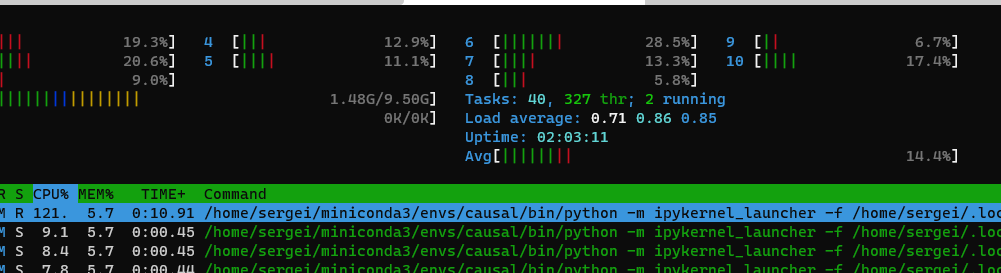

With parallel:
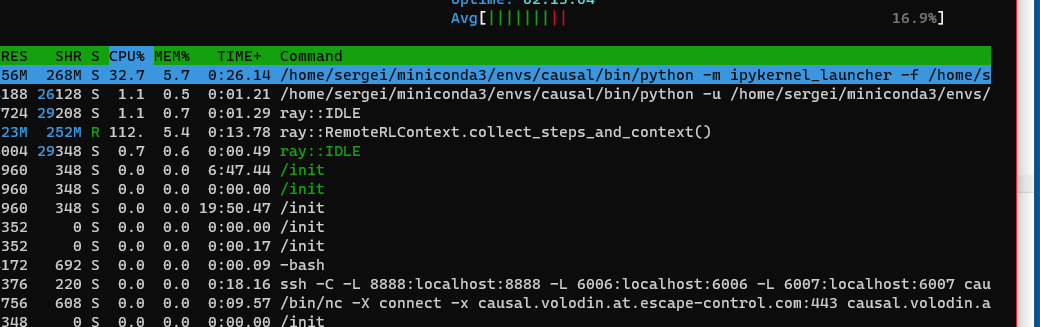